**Nom:** Joel Ferrando Ruiz <br>
**Dataset:** Telugu Vowel Dataset <br>
**GitHub:** https://github.com/JoelFerrando/MD3-Kaggle

# Telugu Vowel Dataset

El dataset tracta de sis vocals del idioma Telegu. El dataset està compost de pixels i la seva classe respectiva. L'objectiu será predir quin tipus de classe (vocal) és.

## **Llibreries**


In [132]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pickle

## **Dades**

### Llegim el csv

In [114]:
df = pd.read_csv("CSV_datasetsix_vowel_dataset_with_class.csv")

In [115]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,class
0,255,255,254,255,255,255,252,255,255,255,254,255,253,255,255,254,253,255,255,253,255,255,255,253,255,255,255,255,254,255,255,254,255,255,255,254,255,255,255,253,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1
1,255,255,254,255,255,254,255,255,255,255,255,254,255,255,252,255,255,254,255,253,255,254,253,255,255,255,255,255,255,254,255,255,250,255,254,255,255,251,252,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1
2,255,254,255,255,255,255,254,255,254,255,255,255,255,253,255,254,254,255,254,255,254,255,255,254,255,255,255,255,255,253,255,255,252,255,255,255,255,255,254,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1
3,254,255,255,255,254,255,255,255,254,255,254,255,255,254,255,255,252,255,254,255,255,254,253,255,255,255,255,255,255,255,254,255,255,255,254,254,255,255,253,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1
4,254,255,255,253,255,255,255,254,255,255,253,255,252,255,255,254,255,255,254,255,255,255,255,253,255,255,255,255,255,254,250,255,251,255,255,255,254,253,254,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1


### Informació de les dades

In [116]:
print("Dimensionalitat de la BBDD:", df.shape)
print("Número de instancies:", df.shape[0])
print("Número de variables:", df.shape[1])

Dimensionalitat de la BBDD: (1200, 785)
Número de instancies: 1200
Número de variables: 785


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 785 entries, pixel0 to class
dtypes: int64(785)
memory usage: 7.2 MB


Podem veure que el Dataset es compon de variables 'pixels' i la 'class' (vocal). Aquestes variables són númeriques i són del tipus Int64. 


### Nulls

In [118]:
df.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
class       0
Length: 785, dtype: int64

El Dataset no conté cap NULL. Per tant no cal tractar-los.

### Dividir Dataset en 'train' & 'test'

In [119]:
pix = []

for i in range(784):
    pix.append('pixel'+str(i))

features = pix

X = df.loc[:, features].values
y = df.loc[:,'class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()

print (X)
print (y)

[[255 255 254 ... 255 255 255]
 [255 255 254 ... 255 255 255]
 [255 254 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [254 255 255 ... 255 255 255]]
[1 1 1 ... 6 6 6]


### Imatges

In [120]:
def row2img(data):
    return np.asfarray(data).reshape((28,28))

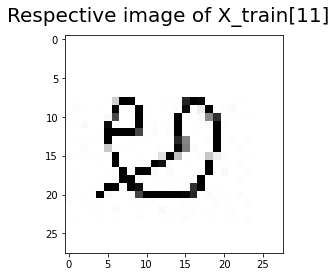

In [121]:
data = X_train[10]
f, ax1 = plt.subplots(1, 1, sharey=True)
f.suptitle('Respective image of X_train[11]', size='20')
ax1.imshow(255-row2img(data), cmap=plt.cm.binary);

## K-Nearset Neighbour Classifier

In [122]:
start_time = time.time()
# choose k between 1 to k
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())


In [136]:
knn = KNeighborsClassifier(n_neighbors = 3, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('K-Nearset Neighbour - Accuracy: ', accuracy_score(y_test, y_pred)* 100)

print("--- %s seconds ---" % (time.time() - start_time))

filename = 'knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))

K-Nearset Neighbour - Accuracy:  83.88888888888889
--- 37.26677656173706 seconds ---


### Resultats
S'han analitzat KNN amb diferents hiperparàmetres. <br>
Podem veure com i cambiant els hiperparàmetres els resultats en 'Accuracy' són molt semblants.

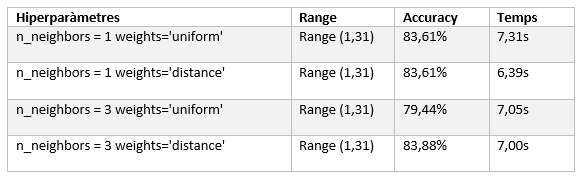

## Random Forest

In [135]:
start_time = time.time()

rfc_model = RandomForestClassifier(n_estimators=1000,  max_depth=20)
rfc_model.fit(X_train, y_train)
rfc_predict = rfc_model.predict(X_test)
print('Random Forest - Accuracy: ', accuracy_score(rfc_predict, y_test) * 100)

print("--- %s seconds ---" % (time.time() - start_time))

filename = 'randomForest_model.sav'
pickle.dump(rfc_model, open(filename, 'wb'))

Random Forest - Accuracy:  83.61111111111111
--- 5.898556470870972 seconds ---


### Resultats
S'han analitzat Random Forest amb diferents hiperparàmetres. <br>
Podem veure com augmentan la màxima profunditat, l'*Accuracy* millora.

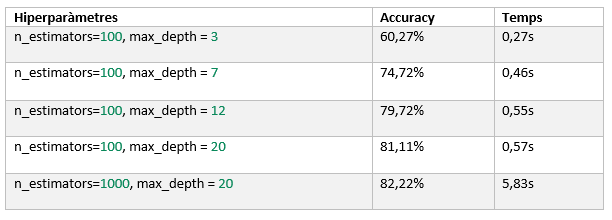

## SVM

In [134]:
start_time = time.time()

svm_model = svm.SVC(kernel='linear', C=1, gamma=2)
svm_model.fit(X_train, y_train)
svc_predict = svm_model.predict(X_test)
print('SVM - Accuracy: ', accuracy_score(svc_predict, y_test) * 100)

print("--- %s seconds ---" % (time.time() - start_time))

filename = 'svm_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))

SVM - Accuracy:  88.05555555555556
--- 0.23472046852111816 seconds ---


### Resultats
S'ha analitzat SVM amb diferents hiperparàemtres. <br>
Tot i cambiant els hiperparàmetres els resultats en 'Accuracy' són molt semblants.


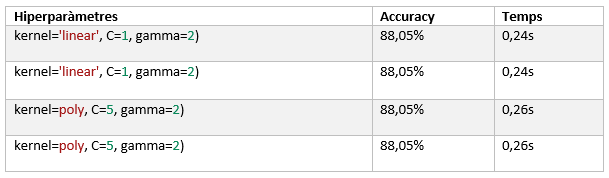

## Aplicant PCA

In [126]:
# Tenim que normalitzar abans de apliclar el mètode 'fit'
df_normalized = (df - df.mean()) / df.std()
pca = PCA(n_components = 20)
pca.fit(df_normalized)

PCA(n_components=20)

In [127]:
# Resultats
loadings = pd.DataFrame(pca.components_.T)
print(loadings)

           0         1         2   ...        17        18        19
0    0.042689  0.008027  0.025052  ... -0.002381 -0.025035  0.014063
1    0.047818 -0.024135  0.045865  ... -0.028604  0.025377 -0.014065
2    0.005069  0.004005  0.005232  ...  0.043023  0.013519  0.017961
3    0.005532  0.001775  0.003290  ...  0.037084  0.014567  0.016050
4    0.004999  0.002224  0.005587  ...  0.042301  0.012931  0.015272
..        ...       ...       ...  ...       ...       ...       ...
780  0.000000  0.000000  0.000000  ...  0.000000 -0.000000  0.000000
781 -0.012440 -0.094422 -0.030076  ... -0.062567 -0.021602  0.012253
782  0.013199 -0.030637 -0.039228  ...  0.055677  0.014532 -0.019263
783 -0.012440 -0.094422 -0.030076  ... -0.062567 -0.021602  0.012253
784  0.128488 -0.038711  0.072602  ... -0.058002 -0.017834 -0.042818

[785 rows x 20 columns]


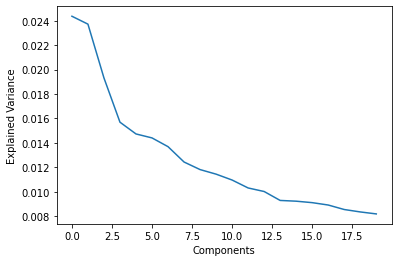

In [128]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

## Resultats

En aquest apartat, es mostraren les gràfiques de 'Accuracy' i Temps dels diferents models classificadors amb els seus millors hiperparàmetres i veurem quin d'aquests es millor.

### Accuracy

Podem veure com en 'Accuracy', els tres models tenen resultats molt parells. El model que dona millor resultat es tracta del SVM (88,05%), després KNN (83,88%) i per últim Random Forest (82,22%).

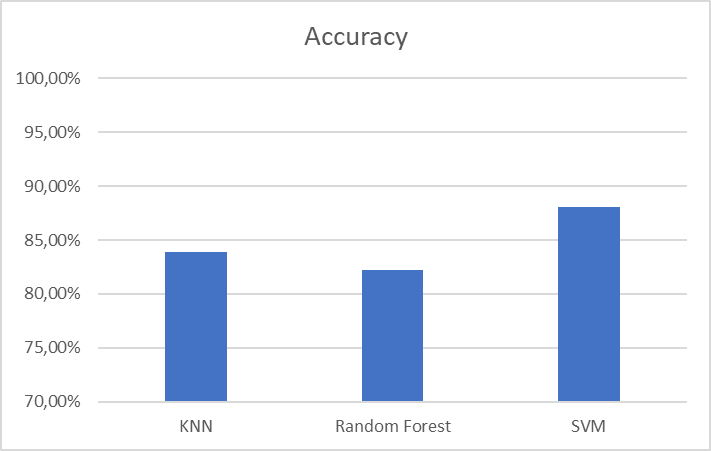

### Temps
Podem veure que en temps, el model SVM és el que triga menys temps amb molta diferència (0,24s). Després el model Random Forest (5,83s) i per últim el KNN (7,00s).

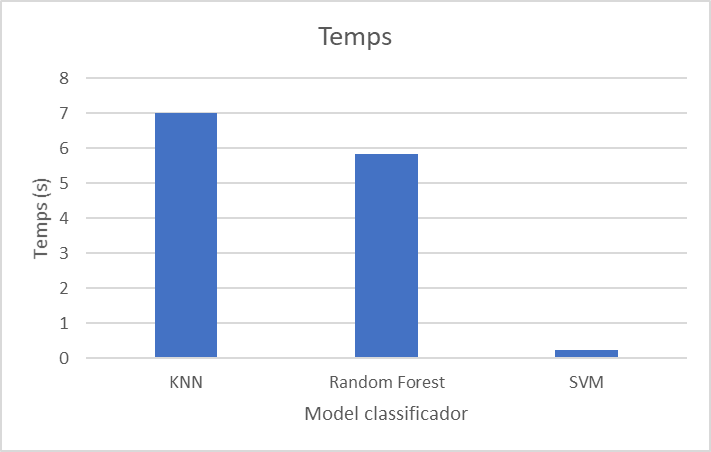

## Conclusions

Després d'analitzar, preprocesar les dades, i utilitzar diferents models classificadors amb diferents hiperparàmetres podem concluir que el millor model classificador aplicat és SVM, tant per 'Accuracy' com en Temps.


## Possibles futurs treballs

*   Treballar amb més vocals del llenguatge Telegu.
*   Aplicar més models classificadors.
*   Probar més configuracions de hiperparàmetres.
